**`Tensorboard for Tensorflow`**

This tutorial will show you step by step guide on how to use Tensorboard for Tensorflow. Tensorboard is a visualization tool provided by Tensorflow to visualize the training process of your model. It is very helpful to visualize the training process, model architecture, and other important details of your model.

 **`What is Tensorboard?`**

TensorBoard is a suite of visualization tools that makes it easier to understand, debug, and optimize TensorFlow programs. It includes a suite of tools for visualizing data flow graphs, profiling, and debugging TensorFlow programs.

**`Why Tensorboard?`**

TensorBoard provides the visualization and tooling needed for machine learning experimentation:

- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower-dimensional space
- Displaying images, text, and audio data
- Profiling input data and model structure
- Displaying profiled data, such as input pipeline processing time, model execution time, and how long each op takes
**`How to use Tensorboard?`**

To use Tensorboard, you need to install Tensorflow and then you can use Tensorboard to visualize the training process of your model. Here is a step by step guide on how to use Tensorboard.

to install Tensorflow and tensorboard, you can use the following command.

```python
!pip install tensorflow
!pip intall tensorboard
```

Using TensorBoard for visualizing the training process of a simple neural network for basic rectangular data involves several steps. Below, I'll outline a basic example using TensorFlow and Keras to train a neural network on some rectangular data and visualize the training process using TensorBoard:

1. **Import necessary libraries**:

In [1]:
!pip install tensorflow
!pip intall tensorboard

ERROR: unknown command "intall" - maybe you meant "install"



In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

2. **Prepare your data**:

For this example, let's assume you have some rectangular data stored in numpy arrays `X_train` and `y_train`.

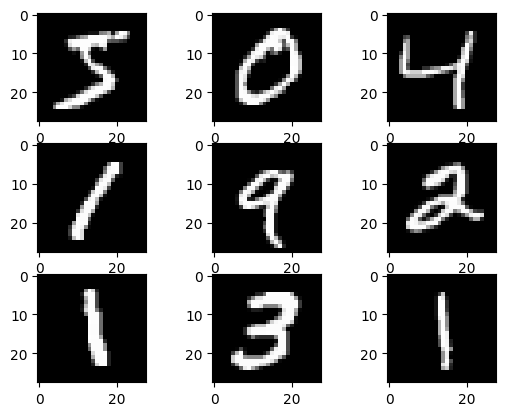

In [6]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()


3. **Define your neural network model**:

In [ ]:
pip install matplotlib


In [7]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)), # is line ma ham na 10 filter use kiya ha or har filter ka size 3x3 ha or input shape 28x28 ha  or 1 is channel
    tf.keras.layers.MaxPooling2D((2,2)), # is line ma ham na 2x2 ka pool size use kiya ha
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),# is line ma ham na 10 filter use kiya ha or har filter ka size 3x3 ha
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

4. **Compile your model**:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5727 - loss: 1.2004 - val_accuracy: 0.9326 - val_loss: 0.2749
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8202 - loss: 0.5322 - val_accuracy: 0.9555 - val_loss: 0.1702
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.8487 - loss: 0.4241 - val_accuracy: 0.9652 - val_loss: 0.1300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8709 - loss: 0.3841 - val_accuracy: 0.9689 - val_loss: 0.1163
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8844 - loss: 0.3485 - val_accuracy: 0.9694 - val_loss: 0.1051
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9606 - loss: 0.1259
Test accuracy: 0.9693999886512756


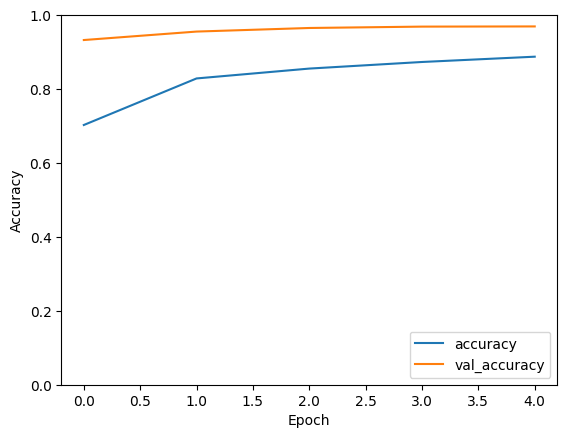

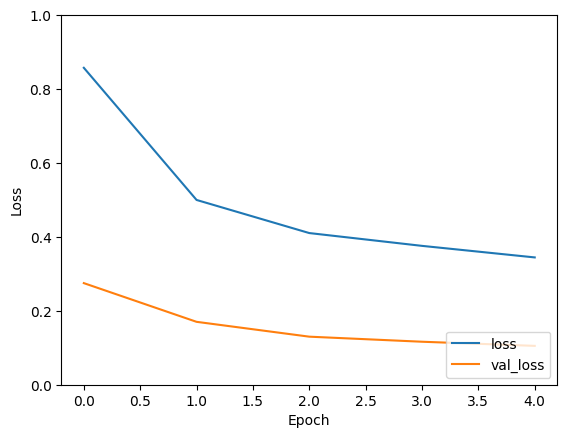

In [8]:
# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

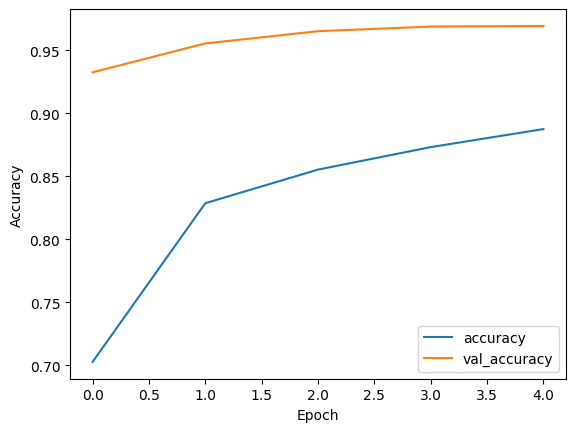

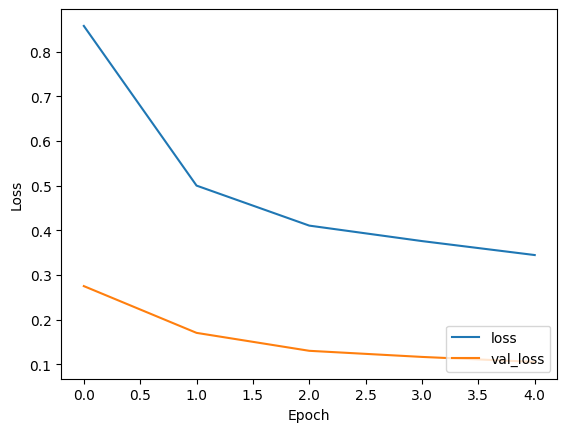

In [10]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

`Lets's do it with tensorboard`

In [11]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5. **Set up TensorBoard callback**:

In [12]:
# Clear any logs from previous runs
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
tensorboard_callback = TensorBoard(log_dir='./logs/adam', histogram_freq=1)

6. **Train your model**:

In [14]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6242 - loss: 1.0589 - val_accuracy: 0.9537 - val_loss: 0.1710
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8703 - loss: 0.4032 - val_accuracy: 0.9644 - val_loss: 0.1254
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8953 - loss: 0.3296 - val_accuracy: 0.9711 - val_loss: 0.1018
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9128 - loss: 0.2818 - val_accuracy: 0.9719 - val_loss: 0.0956
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9200 - loss: 0.2528 - val_accuracy: 0.9751 - val_loss: 0.0893


7. **Run TensorBoard**:

Open a terminal and navigate to your working directory. Then run:


In [15]:
# Activate inline tensorboard extension
%load_ext tensorboard

In [16]:
# run tensorboad in the notebook try using with and without %sign
%tensorboard --logdir=./logs

8. **Visualize training progress**:

Once TensorBoard is running, you can navigate to the Scalars tab to visualize metrics like loss and accuracy over training epochs. You can also explore other tabs like Graphs, Histograms, and Distributions to gain insights into your model's structure and behavior.

That's it! This is a basic example of how to use TensorBoard to visualize the training process of a simple neural network for rectangular data. You can further customize the TensorBoard callback to log additional information or use more advanced features as needed.

9. **Hyper parameter Tuning and visualization**:

In [17]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model with SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs/SGD', histogram_freq=1)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])
%tensorboard --logdir=./logs

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2550 - loss: 2.0914 - val_accuracy: 0.8526 - val_loss: 0.6236
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7262 - loss: 0.8181 - val_accuracy: 0.9224 - val_loss: 0.2901
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8049 - loss: 0.5692 - val_accuracy: 0.9439 - val_loss: 0.2057
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8350 - loss: 0.4736 - val_accuracy: 0.9543 - val_loss: 0.1665
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8537 - loss: 0.4223 - val_accuracy: 0.9583 - val_loss: 0.1423


Reusing TensorBoard on port 6006 (pid 1544), started 0:04:32 ago. (Use '!kill 1544' to kill it.)

**Hyper-Paramter Tuning and Visualization using Tensorboard**

In [18]:
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizer = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), 
                  callbacks=[tensorboard_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=./logs

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.4203 - loss: 1.5630 - val_accuracy: 0.9335 - val_loss: 0.2551
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8113 - loss: 0.5567 - val_accuracy: 0.9527 - val_loss: 0.1720
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8579 - loss: 0.4335 - val_accuracy: 0.9615 - val_loss: 0.1294
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8767 - loss: 0.3598 - val_accuracy: 0.9585 - val_loss: 0.1304
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8953 - loss: 0.3098 - val_accuracy: 0.9698 - val_loss: 0.0964
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9122 - loss: 0.2607 - val_accuracy: 0.9751 - val_loss: 0.0811
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9168 - loss: 0.2508 - val_accuracy: 0.9721 - val_loss: 0.0874
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9168 - loss: 0.2502 - 

Reusing TensorBoard on port 6006 (pid 1544), started 0:12:56 ago. (Use '!kill 1544' to kill it.)

In [4]:
# Run TensorBoard
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6007 (pid 60114), started 0:06:08 ago. (Use '!kill 60114' to kill it.)

# **`Run Hyperparameter tuning and save the best model using TensorBoard.`**

In [ ]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint
# Import the ModelCheckpoint callback
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizers = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir = f'./logs/{optimizer}_batch_size_{batch_size}'
        
        # Define the ModelCheckpoint callback to save the best model based on validation accuracy
        checkpoint_callback = ModelCheckpoint(filepath=f'./models/best_model_{optimizer}_batch_size_{batch_size}.h5',
                                              monitor='val_accuracy',
                                              save_best_only=True,
                                              mode='max',
                                              verbose=1)
        
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        
        # Train the model with the callbacks
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), callbacks=[tensorboard_callback, checkpoint_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=./logs

In [5]:
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6007 (pid 60114), started 0:09:45 ago. (Use '!kill 60114' to kill it.)